In [1]:
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import matrix_rank, inv
from pprint import pprint
import sys
import os
current_notebook_dir = os.getcwd()
# Replace with the path to your IT_PI.py function
project_root_dir = os.path.join(current_notebook_dir, '..', '..')
it_pi_module_dir = project_root_dir
sys.path.append(it_pi_module_dir)
import IT_PI
plt.rcParams['font.family'] = 'Times New Roman'  # Set the font to Times New Roman
plt.rcParams['text.usetex'] = True  # Use LaTeX for all text rendering/', VIEW.as_view(), name=''),
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import ScalarFormatter



In [2]:
data = pd.read_csv("dataset_porosity.csv")
data.head()

,Material,etamP,V,d,rho,Cp,alpha,Tm-T0,H,L,Phi
0,Inconel 718,189.0,0.4,0.0001,7400.0,720.0,0.000006,1316,0.00008,0.00006,0.0357
1,Inconel 718,189.0,0.6,0.0001,7400.0,720.0,0.000006,1316,0.00008,0.00006,0.0143
2,Inconel 718,189.0,0.8,0.0001,7400.0,720.0,0.000006,1316,0.00008,0.00006,0.0032
3,Inconel 718,189.0,1.0,0.0001,7400.0,720.0,0.000006,1316,0.00008,0.00006,0.0051
4,Inconel 718,189.0,1.2,0.0001,7400.0,720.0,0.000006,1316,0.00008,0.00006,0.0036


In [3]:
output_list = ["Phi"]
input_list = ["etamP", "V", "Tm-T0", "d","rho", "Cp", "alpha", "H", "L"]
X = np.array(data[input_list])
Y = np.array(data[output_list])

In [4]:
D_in = np.matrix([[ 2,  1,  0,  1, -3,  2,  2,  1,  1],
        [-3, -1,  0,  0,  0, -2, -1,  0,  0],
        [ 1,  0,  0,  0,  1,  0,  0,  0,  0],
        [ 0,  0,  1,  0,  0, -1,  0,  0,  0]])
num_input      = 2

In [5]:
print("Rank of D_in:", matrix_rank(D_in))
print("D_in matrix:\n", D_in)
num_rows   = np.shape(D_in)[0]
num_cols   = np.shape(D_in)[1]
num_basis      = D_in.shape[1] -matrix_rank(D_in)
basis_matrices = IT_PI.calc_basis(D_in, num_basis)
print("Basis vectors:")
pprint(basis_matrices)

Rank of D_in: 4
D_in matrix:
 [[ 2  1  0  1 -3  2  2  1  1]
 [-3 -1  0  0  0 -2 -1  0  0]
 [ 1  0  0  0  1  0  0  0  0]
 [ 0  0  1  0  0 -1  0  0  0]]
Basis vectors:
matrix([[ 1., -3.,  0., -2., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  2., -1.,  0.,  0., -1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  1.,  0.,  0., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0., -1.]])


In [6]:
data[input_list]

,etamP,V,Tm-T0,d,rho,Cp,alpha,H,L
0,189.0,0.400000,1316,0.00010,7400.0,720.0,0.000006,0.000080,0.00006
1,189.0,0.600000,1316,0.00010,7400.0,720.0,0.000006,0.000080,0.00006
2,189.0,0.800000,1316,0.00010,7400.0,720.0,0.000006,0.000080,0.00006
3,189.0,1.000000,1316,0.00010,7400.0,720.0,0.000006,0.000080,0.00006
4,189.0,1.200000,1316,0.00010,7400.0,720.0,0.000006,0.000080,0.00006
...,...,...,...,...,...,...,...,...,...
87,56.0,0.999752,1429,0.00006,6881.0,790.0,0.000005,0.000080,0.00004
88,56.0,1.249860,1429,0.00006,6881.0,790.0,0.000005,0.000074,0.00004
89,56.0,1.498670,1429,0.00006,6881.0,790.0,0.000005,0.000074,0.00004
90,56.0,1.750720,1429,0.00006,6881.0,790.0,0.000005,0.000078,0.00004


In [7]:
data.describe()

,etamP,V,d,rho,Cp,alpha,Tm-T0,H,L,Phi
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,98.397826,0.923739,0.000090,6534.630435,762.500000,0.000006,1371.478261,0.000096,0.000045,0.016918
std,54.049652,0.471282,0.000016,1359.563009,45.828754,0.000002,57.009442,0.000019,0.000014,0.022945
min,34.000000,0.139000,0.000060,3920.000000,720.000000,0.000005,1316.000000,0.000060,0.000020,0.000090
25%,54.600000,0.600000,0.000070,6881.000000,720.000000,0.000005,1316.000000,0.000080,0.000030,0.003638
50%,76.100000,0.800000,0.000100,7400.000000,720.000000,0.000006,1316.000000,0.000092,0.000045,0.007332
75%,153.000000,1.200000,0.000100,7400.000000,790.000000,0.000006,1429.000000,0.000120,0.000060,0.021625
max,191.000000,2.003590,0.000100,7400.000000,830.000000,0.000010,1430.000000,0.000124,0.000060,0.128301


In [8]:
# Run dimensionless learning
results = IT_PI.main(
    X,
    Y.reshape(-1, 1),
    basis_matrices,
    num_input=num_input,
    estimator="binning",
    estimator_params={"num_bins": 50},
    popsize=3000,
    maxiter=50000,
    num_trials=50,
    seed=50
)




------------------------------------------------------------
num of parameters: 10

Using estimator: 'binning' with hyperparameters: {'num_bins': 50}

(1500_w,3000)-aCMA-ES (mu_w=756.3,w_1=0%) in dimension 10 (seed=50, Tue Oct 28 11:12:46 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1   3000 -2.569912949546655e+00 1.0e+00 9.08e-01  7e-01  9e-01 0:03.8
    2   6000 -2.569912949546655e+00 2.0e+00 1.12e+00  8e-01  1e+00 0:07.8
    3   9000 -2.584981366515350e+00 3.8e+00 1.36e+00  9e-01  1e+00 0:11.8
    4  12000 -2.569912949546655e+00 6.0e+00 1.57e+00  9e-01  1e+00 0:15.9
    5  15000 -2.569912949546655e+00 8.1e+00 1.74e+00  9e-01  1e+00 0:19.9
    7  21000 -2.569912949546655e+00 1.2e+01 1.90e+00  8e-01  1e+00 0:28.0
    9  27000 -2.584981366515350e+00 1.5e+01 1.90e+00  6e-01  1e+00 0:36.2
   11  33000 -2.584981366515350e+00 1.8e+01 1.89e+00  6e-01  1e+00 0:44.4
   13  39000 -2.584981366515350e+00 1.9e+01 1.94e+00  5e-01  9e-01 0:52.4
   16  48000 -2.5

In [15]:
# Run dimensionless learning
results = IT_PI.main(
    X,
    Y.reshape(-1, 1),
    basis_matrices,
    num_input=num_input,
    estimator="binning",
    estimator_params={"num_bins": 50},
    popsize=3000,
    maxiter=50000,
    num_trials=50,
    seed=50
)




------------------------------------------------------------
num of parameters: 10

Using estimator: 'binning' with hyperparameters: {'num_bins': 50}

(1500_w,3000)-aCMA-ES (mu_w=756.3,w_1=0%) in dimension 10 (seed=50, Tue Oct 28 11:21:57 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1   3000 -2.569912949546655e+00 1.0e+00 9.08e-01  7e-01  9e-01 0:04.0
    2   6000 -2.569912949546655e+00 2.0e+00 1.12e+00  8e-01  1e+00 0:08.0
    3   9000 -2.584981366515350e+00 3.8e+00 1.36e+00  9e-01  1e+00 0:12.0
    4  12000 -2.569912949546655e+00 6.0e+00 1.57e+00  9e-01  1e+00 0:15.9
    5  15000 -2.569912949546655e+00 8.1e+00 1.74e+00  9e-01  1e+00 0:19.9
    7  21000 -2.569912949546655e+00 1.2e+01 1.90e+00  8e-01  1e+00 0:27.9
    9  27000 -2.584981366515350e+00 1.5e+01 1.90e+00  6e-01  1e+00 0:36.1
   11  33000 -2.584981366515350e+00 1.8e+01 1.89e+00  6e-01  1e+00 0:44.4
   13  39000 -2.584981366515350e+00 1.9e+01 1.94e+00  5e-01  9e-01 0:52.4
   16  48000 -2.5

In [9]:
input_PI = results["input_PI"]
output_PI = results["output_PI"]
epsilon  = results["irreducible_error"]
uq       = results["uncertainty"]

coef_pi_list     = results["input_coef"]
variables = input_list;

optimal_pi_lab   = IT_PI.create_labels(np.array(coef_pi_list).reshape(-1, len(variables)), variables)
for j, label in enumerate(optimal_pi_lab):
    print(f'Optimal_pi_lab[{j}] = {label}')
    
#input_PI[:, [0, 1]] = input_PI[:, [1, 0]]


Optimal_pi_lab[0] = $\frac{V^{0.09} \cdot Tm-T0^{0.62} \cdot d^{1.0} \cdot rho^{0.32} \cdot Cp^{0.62} \cdot L^{0.34}}{etamP^{0.32} \cdot alpha^{0.36} \cdot H^{0.34}}$
Optimal_pi_lab[1] = $\frac{V^{0.25} \cdot Tm-T0^{0.54} \cdot d^{1.0} \cdot rho^{0.45} \cdot Cp^{0.54} \cdot alpha^{0.03} \cdot L^{0.15}}{etamP^{0.45} \cdot H^{0.28}}$


In [10]:
results['input_coef'] #'input_coef_basis'

[array([[-0.32,  0.09,  0.62,  1.  ,  0.32,  0.62, -0.36, -0.34,  0.34]]),
 array([[-0.45,  0.25,  0.54,  1.  ,  0.45,  0.54,  0.03, -0.28,  0.15]])]

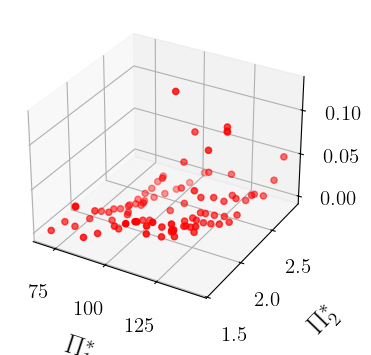

In [11]:
fig = plt.figure(figsize=(4, 4))
plt.rcParams['font.family'] = 'Times New Roman' 
plt.rcParams['text.usetex'] = True  
ax = fig.add_subplot(111, projection='3d')
ax.scatter(input_PI[:, 0].ravel(), input_PI[:, 1].ravel(), output_PI.ravel(), c='r', marker='o')
def prepare_label(label):
    if '$' in label:
        return r'{}'.format(label)
    return label
ax.set_xlabel(r'$\Pi_1^*$', fontsize=20, labelpad=20)  # Increase labelpad as needed
ax.set_ylabel(r'$\Pi_2^*$', fontsize=20, labelpad=25)
ax.set_zlabel(r'$C_f$', fontsize=15, labelpad=20)

ax.xaxis.set_tick_params(width=1, labelsize=15)
ax.yaxis.set_tick_params(width=1, labelsize=15)
ax.zaxis.set_tick_params(width=1, labelsize=15)
ax.tick_params(axis='both', which='major', labelsize=15, pad=10)
ax.grid(True)  
# plt.savefig('roughness_dimensionless.png', dpi=300, bbox_inches='tight')
# plt.savefig('roughness_dimensionless.eps', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

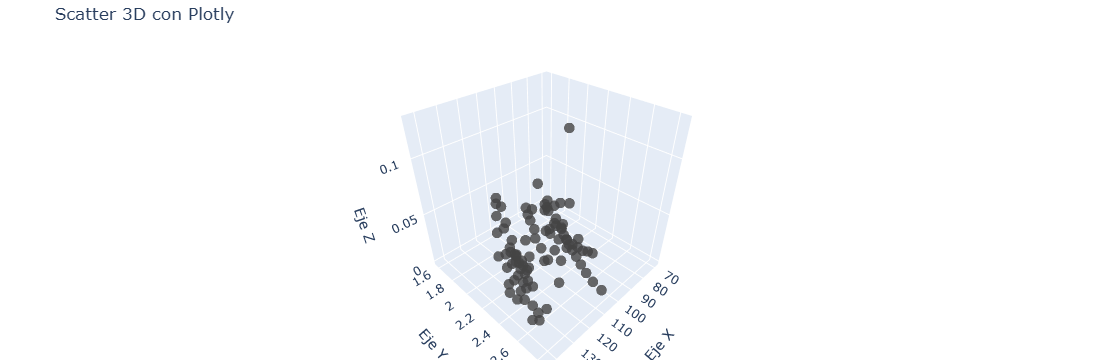

In [16]:
import plotly.graph_objects as go
# Crear figura 3D
fig = go.Figure(data=[go.Scatter3d(
    x=input_PI[:, 0].ravel().ravel() ,
    y=input_PI[:, 1].ravel().ravel() ,
    z=output_PI.ravel() ,
    mode='markers',
    marker=dict(
        size=6,
        color=Y,           # color según el valor de z
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Configurar diseño
fig.update_layout(
    title='Scatter 3D con Plotly',
    scene=dict(
        xaxis_title='Eje X',
        yaxis_title='Eje Y',
        zaxis_title='Eje Z'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Mostrar figura
fig.show()

In [12]:
epsilon

[np.float64(1.221402758160169),
 np.float64(1.025289811592276),
 np.float64(1.221402758160169)]

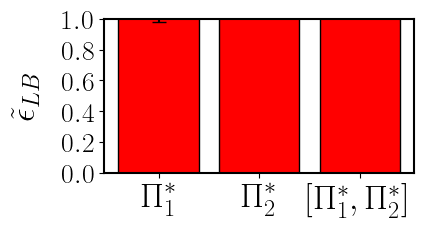

In [27]:
#exchange the first and the second value
epsilon[1],epsilon[0] = epsilon[0],epsilon[1]
uq[1],uq[0] = uq[0],uq[1]
x_labels = [r'$\Pi_1^*$', r'$\Pi_2^*$', r"$[\Pi_1^*,\Pi_2^*]$"]
plt.figure(figsize=(4, 2))
plt.rcParams['font.family'] = 'Times New Roman'  # Set the font to Times New Roman
plt.rcParams['text.usetex'] = True  # Use LaTeX for all text rendering
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)

# Use uq_values as the error bars
plt.bar(x_labels, epsilon, yerr=uq, capsize=5, edgecolor='black',color = 'red')
plt.xticks(fontsize=25)
plt.yticks(fontsize=20)
plt.ylabel(r'$\tilde{\epsilon}_{L B}$', fontsize=25, labelpad=15)
plt.ylim([0, 1])
plt.savefig('Colebrook_rank.eps', dpi=300, bbox_inches='tight',transparent=True)
plt.show()

In [14]:
log_data         = np.log1p(input_PI)  # np.log1p is used to avoid log(0) issues
scaler          = StandardScaler()
scaled_log_data = scaler.fit_transform(log_data)
# Perform KMeans clustering on the scaled log-transformed data
regions                     = IT_PI.partition_space(scaled_log_data, n_clusters= 10)
results_region, ratio_X1, ratio_X2 = IT_PI.analyze_regions(input_PI[:,0], input_PI[:,1], Y, regions)

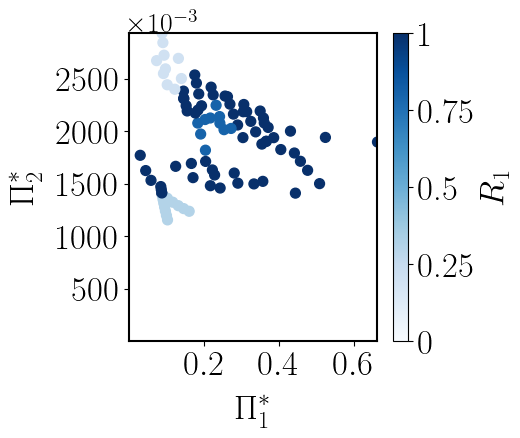

In [15]:
def plot_ratio_X1(X1, X2, ratio_X1):
    plt.figure(figsize=(4, 4))
    scatter = plt.scatter(X1, X2, c=ratio_X1, cmap='Blues', s=50, vmin=0, vmax=1) 
    plt.gca().spines['top'].set_linewidth(1.5)
    plt.gca().spines['bottom'].set_linewidth(1.5)
    plt.gca().spines['left'].set_linewidth(1.5)
    plt.gca().spines['right'].set_linewidth(1.5)
    plt.xlabel(r" $\Pi_{1}^*$", fontsize=25, labelpad=10)  
    plt.ylabel(r" $\Pi_2^*$", fontsize=25, labelpad=10)
    #plt.xscale('log')
    plt.xticks(fontsize=25)
    ax = plt.gca()
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-3, -3))
    ax.yaxis.set_major_formatter(formatter)
    plt.yticks(fontsize=25)
    ax.yaxis.get_offset_text().set_fontsize(20)
    offset_text = ax.yaxis.get_offset_text()
    x, y = offset_text.get_position()  # current position
    offset_text.set_position((x , y+1.5))  # shift it slightly left

    cbar = plt.colorbar(scatter)
    cbar.set_label('$R_1$', fontsize=25)
    cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])  # ✅ set tick locations
    cbar.set_ticklabels(['0', '0.25', '0.5', '0.75', '1'])  # ✅ set labels
    cbar.ax.tick_params(labelsize=25)  # ✅ set font size
    plt.xlim(10**(-3.5), np.max(X1))
    plt.ylim(0.0002, np.max(X2))
    #plt.savefig('roughness_region_1.png', dpi=300, bbox_inches='tight',transparent=True)
    plt.savefig('roughness_region_1.pdf', dpi=200, bbox_inches='tight',transparent=True)
    plt.show()
    
plot_ratio_X1(input_PI[:,0], input_PI[:,1], ratio_X1)
